In [63]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np
from datetime import datetime
%matplotlib inline

def days_in(start_date, end_date):
    return (datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')). days

df = pd.read_csv('weight-data.csv')
df = df.sort_values(by='日期')
ds = days_in(df['日期'].min(), df['日期'].max()) + 1

height_df = pd.read_csv('height-data.csv')
height_df = height_df.sort_values(by='日期')
h_ds = days_in(height_df['日期'].min(), height_df['日期'].max()) + 1

In [64]:
avg = (df['体重'].max() - df['体重'].min()) / ds
avgs = pd.Series([avg for x in range(ds)])

h_avg = (height_df['身高'].max() - height_df['身高'].min()) / h_ds
h_avgs = pd.Series([h_avg for x in range(h_ds)])

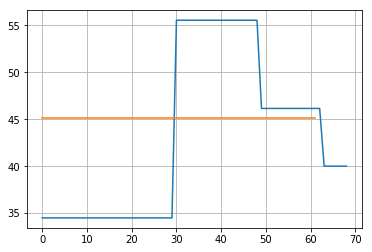

In [65]:
p_avgs = pd.Series()
interpolated = pd.Series()
for i in range(2, df.shape[0] + 1):
    (w0, ) = df[i - 2:i - 1]['体重']
    (w1, ) = df[i - 1:i]['体重']
    (s, ) = df[i - 2:i - 1]['日期']
    (e, ) = df[i - 1:i]['日期']
    days = days_in(s, e) + 1
    tmp_avg = (w1 - w0) / days
    tmp_avgs = pd.Series([tmp_avg for x in range(days + 1)])
    p_avgs = p_avgs.append(tmp_avgs, ignore_index=True)
    
    tmp_inc = pd.Series([w0 + y * tmp_avg for y in range(days)])
    interpolated = interpolated.append(tmp_inc , ignore_index=True)

plt.grid()
plt.plot(p_avgs)
plt.plot(avgs)

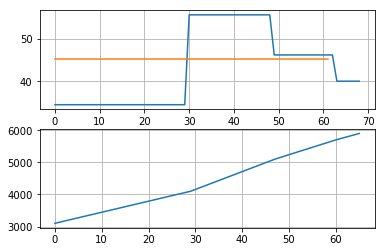

In [66]:
interpolated = interpolated.append(pd.Series([df['体重'][df.shape[0] - 1]]), ignore_index=True)
#interpolated
plt.subplot(211)
plt.grid()
plt.plot(p_avgs)
plt.plot(avgs)
plt.subplot(212)
plt.grid()
plt.plot(interpolated)

In [67]:
p_avgs.to_csv('periodical-avg.csv', index=None)
avgs.to_csv('avgs.csv', index=None)
interpolated.to_csv('interpolated.csv', index=None)

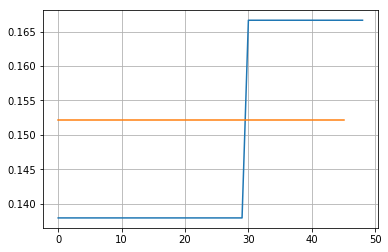

In [68]:
h_p_avgs = pd.Series()
h_interpolated = pd.Series()
for i in range(2, height_df.shape[0] + 1):
    (w0, ) = height_df[i - 2:i - 1]['身高']
    (w1, ) = height_df[i - 1:i]['身高']
    (s, ) = height_df[i - 2:i - 1]['日期']
    (e, ) = height_df[i - 1:i]['日期']
    days = days_in(s, e) + 1
    tmp_avg = (w1 - w0) / days
    tmp_avgs = pd.Series([tmp_avg for x in range(days + 1)])
    h_p_avgs = h_p_avgs.append(tmp_avgs, ignore_index=True)
    
    tmp_inc = pd.Series([w0 + y * tmp_avg for y in range(days)])
    h_interpolated = h_interpolated.append(tmp_inc , ignore_index=True)
plt.grid()
plt.plot(h_p_avgs)
plt.plot(h_avgs)

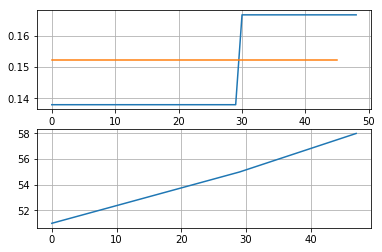

In [69]:
h_interpolated = h_interpolated.append(pd.Series([height_df['身高'][height_df.shape[0] - 1]]), ignore_index=True)
#interpolated
plt.subplot(211)
plt.grid()
plt.plot(h_p_avgs)
plt.plot(h_avgs)
plt.subplot(212)
plt.grid()
plt.plot(h_interpolated)

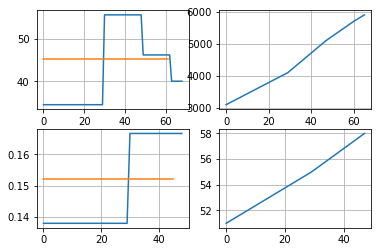

In [72]:
bmi = pd.DataFrame(columns=['data'])
bmi['data'] = pd.Series((interpolated / 1000) / (h_interpolated / 100) / (h_interpolated / 100)).dropna()
bmi_upper = [23.9 for x in range(bmi.size)]
bmi_lower = [18.5 for x in range(bmi.size)]

plt.subplot(221)
plt.grid()
plt.plot(p_avgs)
plt.plot(avgs)
plt.subplot(222)
plt.grid()
plt.plot(interpolated)

plt.subplot(223)
plt.grid()
plt.plot(h_p_avgs)
plt.plot(h_avgs)
plt.subplot(224)
plt.grid()
plt.plot(h_interpolated)

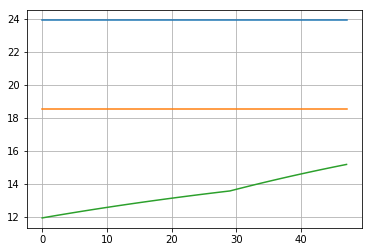

In [71]:
plt.grid()
plt.plot(bmi_upper)
plt.plot(bmi_lower)
plt.plot(bmi)

In [61]:
bmi

,data
0,11.918493
1,11.986146
2,12.052901
3,12.118767
4,12.183756
5,12.247881
6,12.311151
7,12.373577
8,12.435171
9,12.495943
